# Two Sum

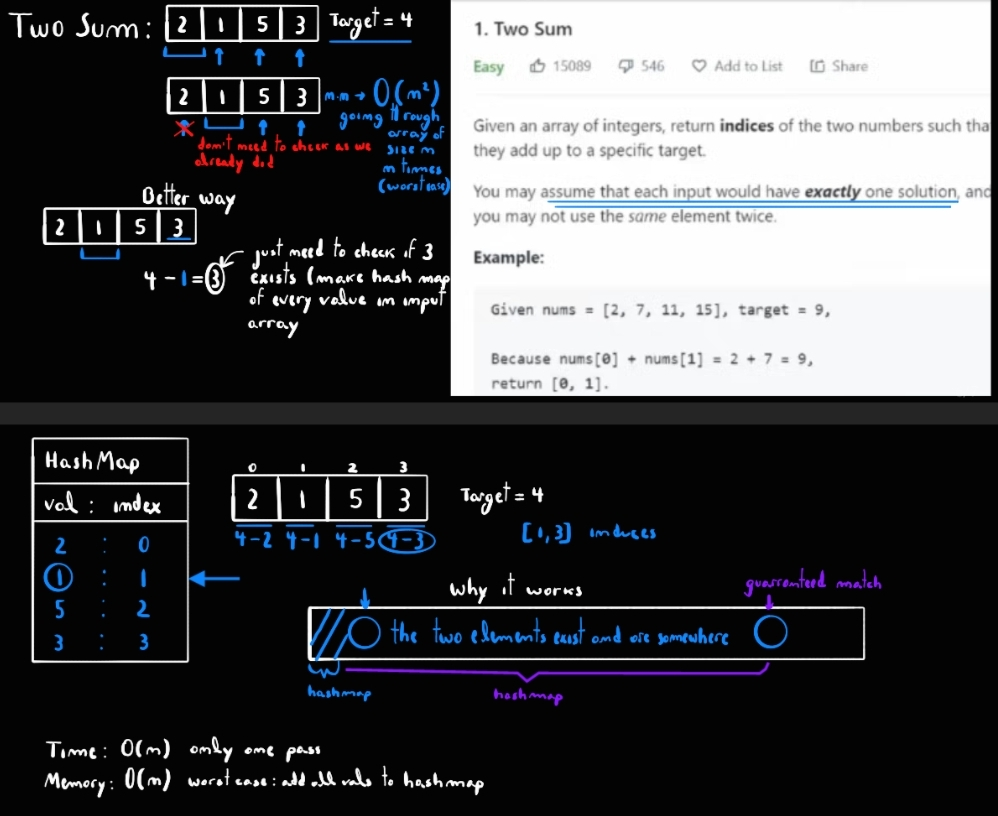

In [ ]:
from typing import List


class Solution:
    def two_sum(self, nums: List[int], target: int) -> List[int]:
        prev_map = {}  # val:index
        for i, n in enumerate(nums):
            diff = target - n
            if diff in prev_map:
                return [prev_map[diff], i]
            prev_map[n] = i